# **Project Name**    - Iris Flower Classification



# **Project Summary -**

**Project Description:**

The Iris Flower Classification project focuses on developing a machine learning model to classify iris flowers into their respective species based on specific measurements. Iris flowers are classified into three species: setosa, versicolor, and virginica, each of which exhibits distinct characteristics in terms of measurements.

**Objective:**

The primary goal of this project is to leverage machine learning techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements. The model aims to automate the classification process, offering a practical solution for identifying iris species.

**Key Project Details:**

- Iris flowers have three species: setosa, versicolor, and virginica.
- These species can be distinguished based on measurements such as sepal length, sepal width, petal length, and petal width.
- The project involves training a machine learning model on a dataset that contains iris flower measurements associated with their respective species.
- The trained model will classify iris flowers into one of the three species based on their measurements.

# **Problem Statement**


The iris flower, scientifically known as Iris, is a distinctive genus of flowering plants. Within this genus, there are three primary species: Iris setosa, Iris versicolor, and Iris virginica. These species exhibit variations in their physical characteristics, particularly in the measurements of their sepal length, sepal width, petal length, and petal width.

**Objective:**

The objective of this project is to develop a machine learning model capable of learning from the measurements of iris flowers and accurately classifying them into their respective species. The model's primary goal is to automate the classification process based on the distinct characteristics of each iris species.

**Project Details:**

- **Iris Species:** The dataset consists of iris flowers, specifically from the species setosa, versicolor, and virginica.
- **Key Measurements:** The essential characteristics used for classification include sepal length, sepal width, petal length, and petal width.
- **Machine Learning Model:** The project involves the creation and training of a machine learning model to accurately classify iris flowers based on their measurements.

This project's significance lies in its potential to streamline and automate the classification of iris species, which can have broader applications in botany, horticulture, and environmental monitoring.

# ***Let's Begin !***

## ***1. Know The Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation

from sklearn.ensemble import RandomForestClassifier


# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("..data/Iris.csv")

### Dataset First View

In [ ]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  6


### Dataset Information

In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### What did i know about the dataset?

* The Iris dataset consists of length and width mesurements of sepal and petal for different species in centimeter.
* There are 150 rows and 6 columns provided in the data.
* No duplicate values exist.
* No Null values exist.

## ***2. Understanding The Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]

In [ ]:
# New updated dataset
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### What all manipulations have i done?

Only drop the first column of the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Distribution of Numerical Variables

#### Overall, the histograms indicate that petal length and petal width, in particular, likely have good discriminatory power for classifying different iris species because of their bimodal nature. This bimodality suggests that different species might have distinctly different petal sizes. Sepal width, being more normally distributed, might be less useful for classification.



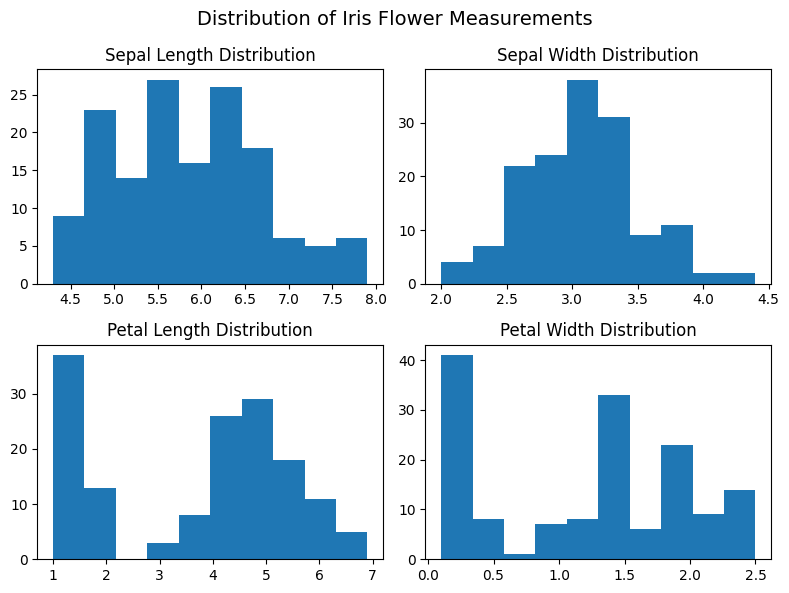

In [ ]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

#### Bimodal refers to a distribution (of data) that has two peaks, or modes. Imagine the shape of a histogram; in a bimodal distribution, you'd see two distinct humps, indicating two common values or ranges of values around which the data cluster. This contrasts with a unimodal distribution, which has a single peak, or a uniform distribution where the values are roughly equally spread across the range.

### In the context of the iris data, the bimodal distributions of petal length and width suggest that there are likely two or more groups of irises with distinct sizes of petals. This is a helpful clue for classification since it hints that these measurements can differentiate between different species of iris.

#### Chart - 2 : Sepal Length vs Sepal Width

In [ ]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

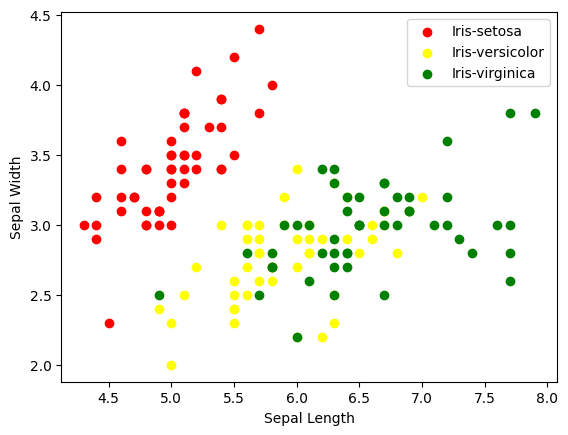

In [ ]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 3 : Petal Length vs Petal Width

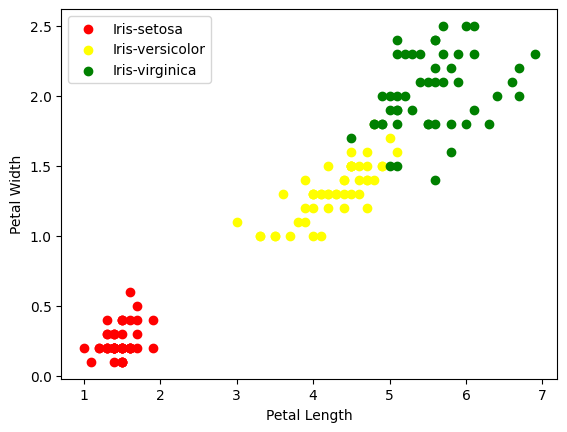

In [ ]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 4 : Sepal Length vs Petal Length

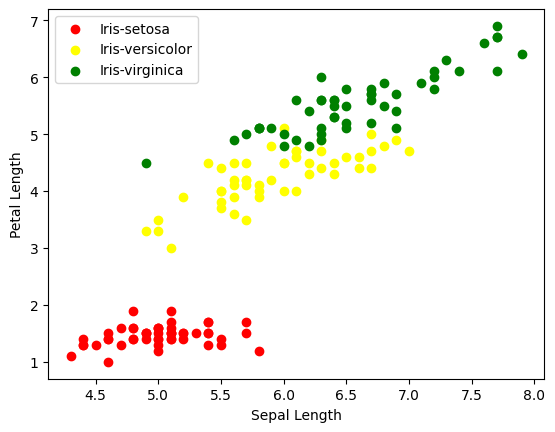

In [ ]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 5 : Sepal Width vs Petal Width

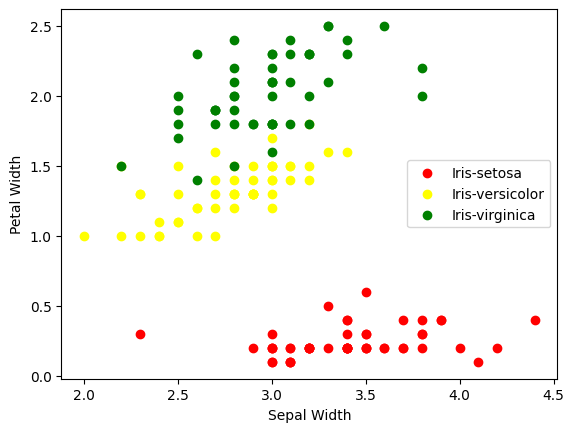

In [ ]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

#### Chart - 6 : Correlation Heatmap

# This correlation matrix shows the linear relationships between the four features of the Iris dataset: Sepal Length, Sepal Width, Petal Length, and Petal Width, all measured in centimeters. Here's a breakdown of the interpretations:

# Positive Correlation: A value closer to +1 indicates a strong positive correlation. This means as one feature increases, the other tends to increase as well.

## Petal Length and Petal Width (0.96): This is a very strong positive correlation, suggesting that irises with longer petals also tend to have wider petals.

## Sepal Length and Petal Length (0.87): A strong positive correlation, implying that irises with longer sepals also have longer petals.

## Sepal Length and Petal Width (0.82): Another strong positive correlation, suggesting that larger sepals are associated with wider petals.

# Negative Correlation: A value closer to -1 indicates a strong negative correlation. As one feature increases, the other tends to decrease.

## Sepal Width and Petal Length (-0.42): A moderate negative correlation. Irises with wider sepals tend to have shorter petals.

## Sepal Width and Petal Width (-0.36): A moderate negative correlation. Irises with wider sepals tend to have narrower petals.

## Sepal Length and Sepal Width (-0.11): A weak negative correlation. There's a slight tendency for irises with longer sepals to have narrower sepals, but this relationship is not very strong.

# No Correlation: A value close to 0 indicates a weak or no linear correlation. The features don't have a predictable linear relationship with each other. While there are no values extremely close to zero here, the -0.11 correlation is fairly weak.

# Diagonal (1.00): The diagonal of the matrix always shows a perfect positive correlation (1.00) because each feature is perfectly correlated with itself.

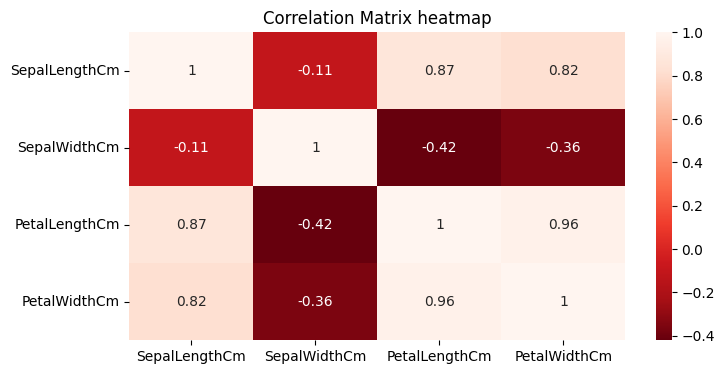

In [ ]:
# Correlation Heatmap Visualization Code
corr_matrix = data.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

## Feature Selection: Correlation helps identify highly correlated features. If two or more features are very strongly correlated, you might consider removing one to simplify your model and prevent multicollinearity issues (which can destabilize some models). In the Iris example, the strong correlation between petal length and petal width suggests that using both might be redundant; one could potentially suffice for classification.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [ ]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['Species'] = le.fit_transform(data['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


### 2. Data Scaling

In [ ]:
# Defining the X and y
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

### 3. Data Splitting

In [ ]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [ ]:
# Checking the train distribution of dependent variable
y_train.value_counts()

1    37
2    35
0    33
Name: Species, dtype: int64

## ***6. ML Model Implementation***

### Interpreting the Matrix:

## Diagonal elements: Represent the true positives for each class. For example, 10 apples were correctly classified as apples.

## Off-diagonal elements: Represent misclassifications. For example, 2 apples were incorrectly classified as oranges (false negative for apple, false positive for orange).

## Rows (0, 1, 2): Represent the three Iris species (Setosa, Versicolor, and Virginica—though the specific mapping to 0,1,2 isn't shown here). Each row shows the performance metrics for that specific class.

## Columns (0, 1, 2): Represent the three classes (Setosa, Versicolor, and Virginica). Each column shows the performance metrics for that specific class.

### precision: How many of the samples predicted to be in this class were actually in this class.
### Precision = TP(TP + FP).

### recall: How many of the samples that actually belong to that class were predicted to be in that class.
### recall = TP(TP + FN).

### the formula for precision is "number of relevant retrieved documents / total number of retrieved documents"
### the formula for recall is "number of relevant retrieved documents / total number of relevant documents"

### f1-score: The harmonic mean of precision and recall (a balanced measure).
### f1-score = 2 * (precision * recall) / (precision + recall)
### support: The number of actual instances of that class in the dataset.



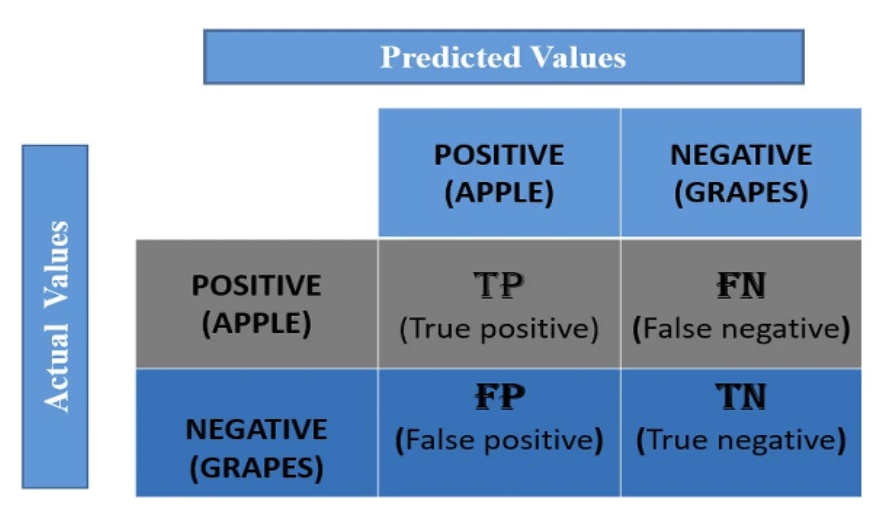

## The above is for binary classification. when it comes to multi-class classification like iris flower classification, the confusion matrix will be a 3x3 matrix. like the below one

## we will calculate the TP AND other parameters like this,

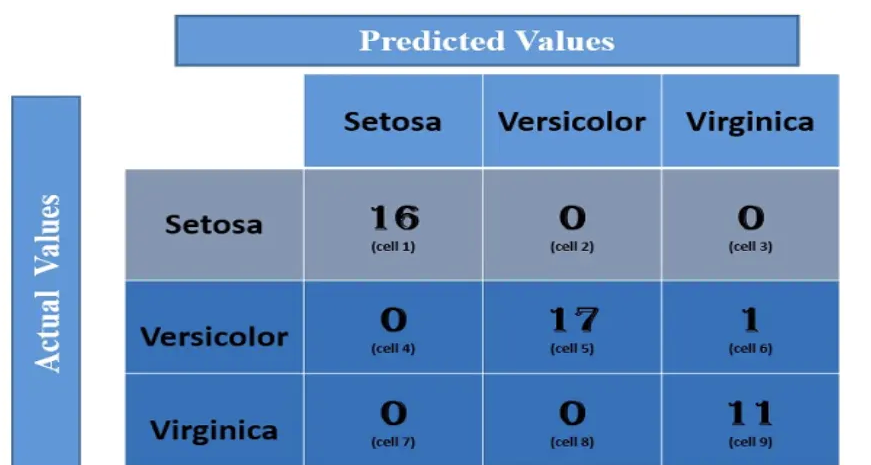

# Let us calculate the TP, TN, FP, and FN values for the class Setosa using the Above tricks:

# TP: The actual value and predicted value should be the same. So concerning Setosa class, the value of cell 1 is the TP value.

# FN: The sum of values of corresponding rows except for the TP value

# FN = (cell 2 + cell3)

# = (0 + 0)

# = 0

# FP: The sum of values of the corresponding column except for the TP value.

# FP = (cell 4 + cell 7)

# = (0 + 0)

# = 0

# TN: The sum of values of all columns and rows except the values of that class that we are calculating the values for.

# TN = (cell 5 + cell 6 + cell 8 + cell 9)

# = 17 + 1 +0 + 11

# = 29

# Similarly, for the Versicolor class, the values/metrics are calculated as below:

# TP: 17 (cell 5)

# FN : 0 + 1 = 1 (cell 4 +cell 6)

# FP : 0 + 0 = 0 (cell 2 + cell 8)

# TN : 16 +0 +0 + 11 =27 (cell 1 + cell 3 + cell 7 + cell 9).

# Meaning of the above parameters:

# TP: True Positive: when the model actual and predicted value is the same.
# TN: True Negative: when the model actual and predicted value is the same but negatively like when it say the flower is not a setosa and it is not a setosa.
# FP: False Positive: when the model actual and predicted value is not the same. but when it say the flower is a setosa and it is not a setosa.
# FN: False Negative: when the model actual and predicted value is not the same. but when it say the flower is not a setosa and it is a setosa.

# Explanation for the below confusion matrix:

# Example (Train Report - Class 1):

# precision = 0.972973: Out of all the instances predicted as class 1, approximately 97.3% were actually class 1. This means there were some false positives—instances predicted as class 1 that belonged to other classes.

# recall = 0.972973: Out of all instances that actually belong to class 1, approximately 97.3% were correctly predicted as class 1. This means there were some false negatives—instances of class 1 misclassified as other classes.

# f1-score = 0.972973: Since precision and recall are virtually the same in this case, the F1-score, which is their harmonic mean, is also approximately 97.3%. This indicates a good balance between precision and recall for class 1.

# support = 37: There are 37 instances of class 1 in the training dataset. This is the number of times Class 1 actually appears in your dataset. So this should be equal to the sum of TP (True Positives) + FN (False Negatives)

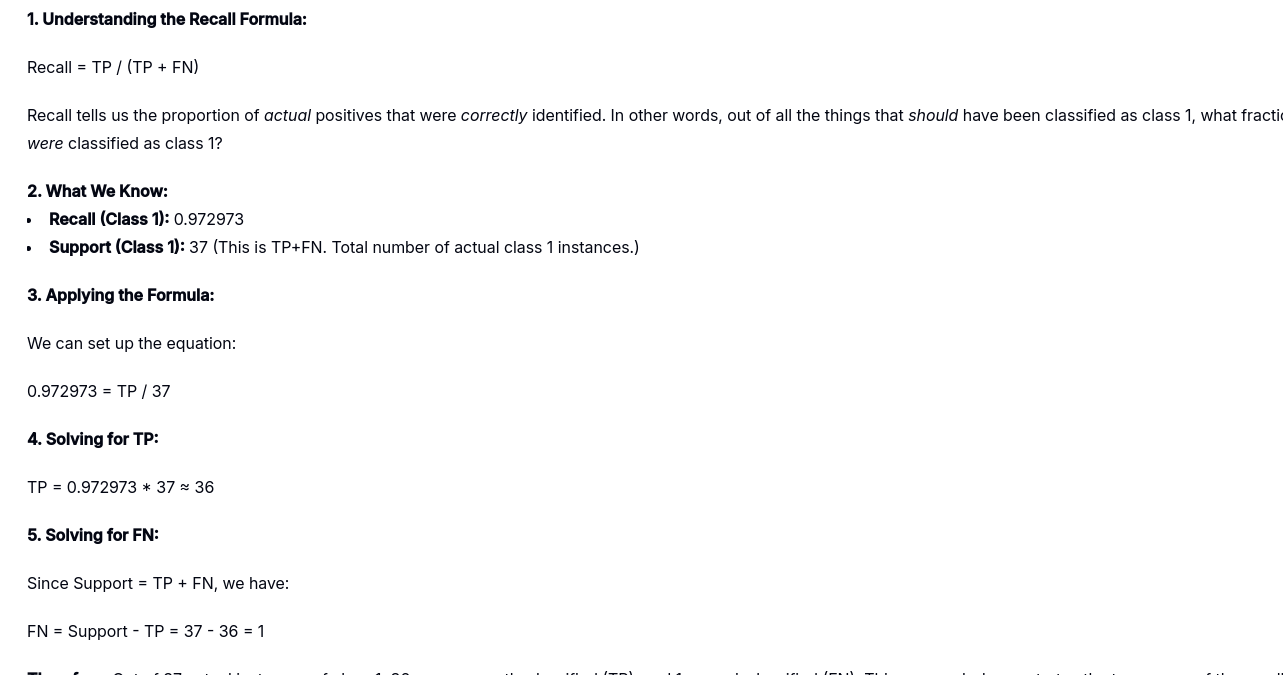

# Based on the given recall we can calculate false negative like the above image

# Accuracy and Other formulas:

# The rows labeled accuracy, macro avg, and weighted avg provide overall performance summaries.

## accuracy: (TP + TN)/ALL, correct predictions overall, relevant primarily in balanced datasets.

## macro avg: The unweighted average of precision, recall, and F1-score for each class:

## Macro-averaged precision: (Precision_0 + Precision_1 + Precision_2) / 3
## Macro-averaged recall: (Recall_0 + Recall_1 + Recall_2) / 3
## Macro-averaged F1-score: (F1_0 + F1_1 + F1_2) / 3
## weighted avg: The weighted average, where the weights are the support (number of instances) of each class:

## Weighted-averaged precision: (Precision_0 * Support_0 + Precision_1 * Support_1 + Precision_2 * Support_2) / Total_Support
## Weighted-averaged recall: (Recall_0 * Support_0 + Recall_1 * Support_1 + Recall_2 * Support_2) / Total_Support
## Weighted-averaged F1-score: (F1_0 * Support_0 + F1_1 * Support_1 + F1_2 * Support_2) / Total_Support




In [ ]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

In [ ]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


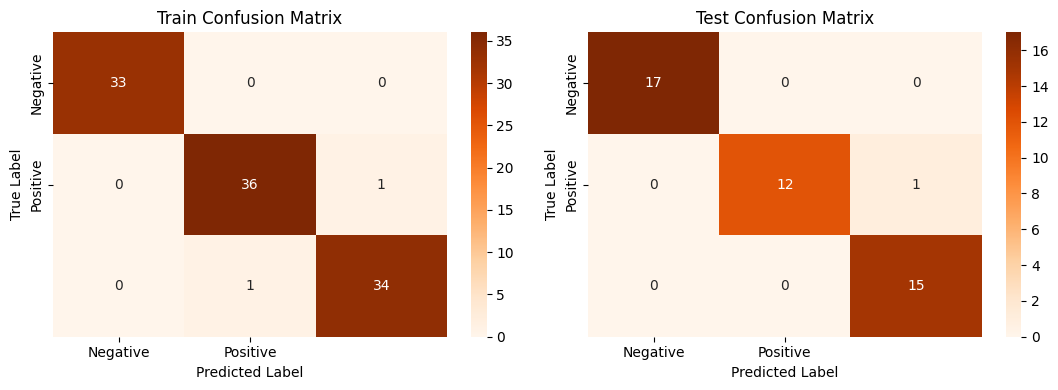


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.972973 | 0.972973 |   0.972973 |  37        |
| 2            |    0.971429 | 0.971429 |   0.971429 |  35        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981467 | 0.981467 |   0.981467 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.9375   | 1        |   0.967742 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [ ]:

# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.980952
Precision Test,0.979167
Recall Train,0.980952
Recall Test,0.977778
Accuracy Train,0.980952
Accuracy Test,0.977778
F1 macro Train,0.980952
F1 macro Test,0.977692


# Interpreting The Results:

## Training Set: Your model has perfect performance on the training set metrics because the precision, recall and f1-scores are all equal to 1. This doesn't tell us as much about how the model would do on a set of unseen data.

## Test Set: Performance is excellent although not perfect. Class 1 has slightly lower precision, recall, and F1-score, indicating some misclassifications.

# Key Observations:

## Excellent Performance: The overall metrics (accuracy, macro avg, weighted avg on test set) are all very high, indicating the model performs well and generalizes.

## Class 1 Slight Weakness: The slightly lower metrics for class 1 on the test set compared to the training set suggest the model generalized really well for the other two classes in the dataset. Might be worth investigating by looking at the confusion matrix to see where the misclassifications happen for Class 1, i.e., the predicted and actual labels.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


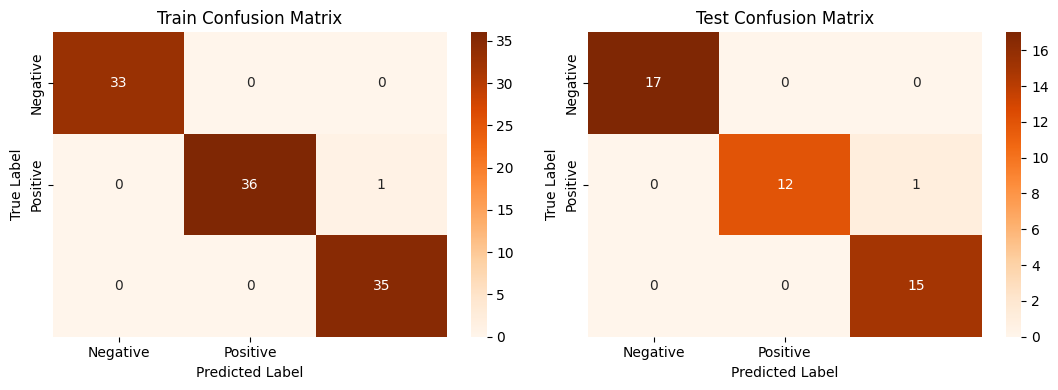


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    1        | 0.972973 |   0.986301 |  37        |
| 2            |    0.972222 | 1        |   0.985915 |  35        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.990741 | 0.990991 |   0.990739 | 105        |
| weighted avg |    0.990741 | 0.990476 |   0.990478 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.9375   | 1        |   0.967742 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Logistic regression tuned'] = lr_score2

##### Which hyperparameter optimization technique have i used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.980952,0.990741
Precision Test,0.979167,0.979167
Recall Train,0.980952,0.990476
Recall Test,0.977778,0.977778
Accuracy Train,0.980952,0.990476
Accuracy Test,0.977778,0.977778
F1 macro Train,0.980952,0.990478
F1 macro Test,0.977692,0.977692


It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned Logistic Regression models.

In [ ]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


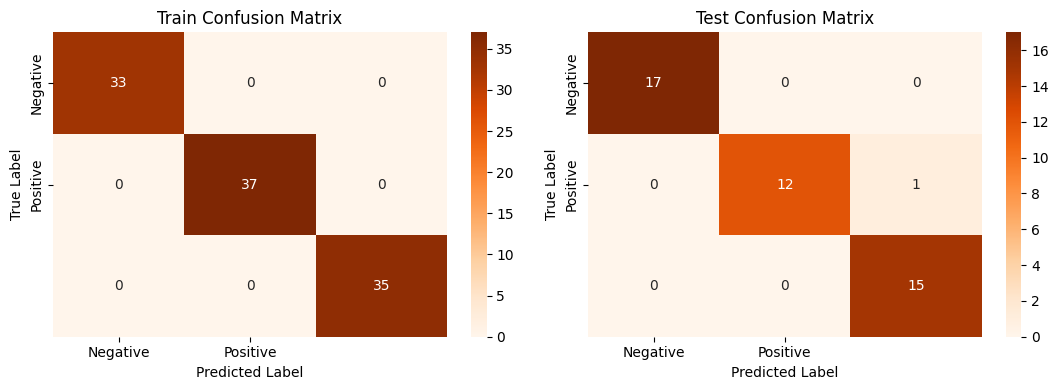


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        33 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        35 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.9375   | 1        |   0.967742 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [ ]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.980952,0.990741,1.000000
Precision Test,0.979167,0.979167,0.979167
Recall Train,0.980952,0.990476,1.000000
Recall Test,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000
Accuracy Test,0.977778,0.977778,0.977778
F1 macro Train,0.980952,0.990478,1.000000
F1 macro Test,0.977692,0.977692,0.977692


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5}


In [ ]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


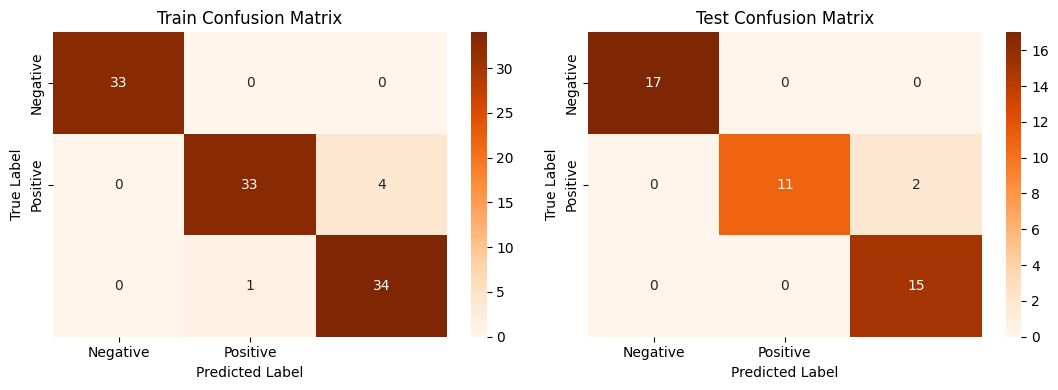


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.970588 | 0.891892 |   0.929577 |  37        |
| 2            |    0.894737 | 0.971429 |   0.931507 |  35        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.955108 | 0.95444  |   0.953695 | 105        |
| weighted avg |    0.954548 | 0.952381 |   0.952353 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    1        | 0.846154 |   0.916667 | 13        |
| 2            |    0.882353 | 1        |   0.9375   | 15        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [ ]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Decision Tree tuned'] = dt2_score

##### Which hyperparameter optimization technique have i used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.980952,0.990741,1.000000,0.954548
Precision Test,0.979167,0.979167,0.979167,0.960784
Recall Train,0.980952,0.990476,1.000000,0.952381
Recall Test,0.977778,0.977778,0.977778,0.955556
Accuracy Train,0.980952,0.990476,1.000000,0.952381
Accuracy Test,0.977778,0.977778,0.977778,0.955556
F1 macro Train,0.980952,0.990478,1.000000,0.952353
F1 macro Test,0.977692,0.977692,0.977692,0.955093


It appears that hyperparameter tuning didn't improved the performance of the Decision Tree model on the test set. The precision, recall, accuracy and F1 scores on the test set are less for the tuned Decision Tree model compare to the untuned Decision Tree model.

The tuned model is not overfitting like the untuned model.

### ML Model - 3 : Random Forest

In [ ]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


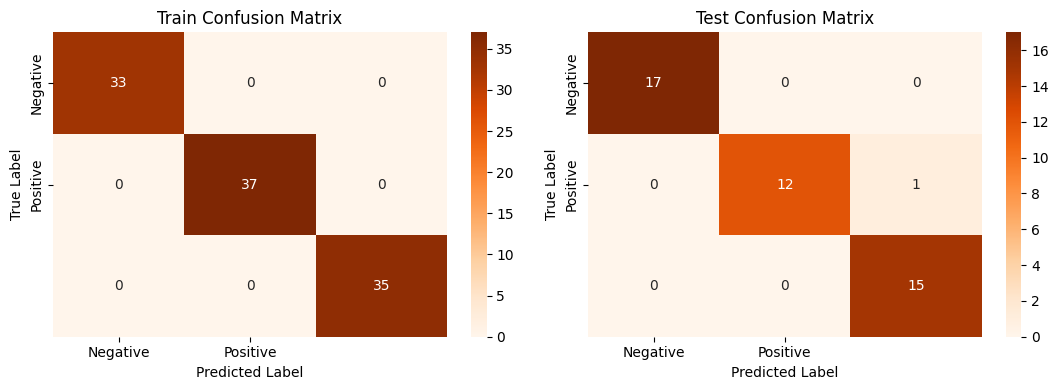


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        33 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        35 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.9375   | 1        |   0.967742 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [ ]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.980952,0.990741,1.000000,0.954548,1.000000
Precision Test,0.979167,0.979167,0.979167,0.960784,0.979167
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000
Recall Test,0.977778,0.977778,0.977778,0.955556,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000
Accuracy Test,0.977778,0.977778,0.977778,0.955556,0.977778
F1 macro Train,0.980952,0.990478,1.000000,0.952353,1.000000
F1 macro Test,0.977692,0.977692,0.977692,0.955093,0.977692


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 12}


In [ ]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


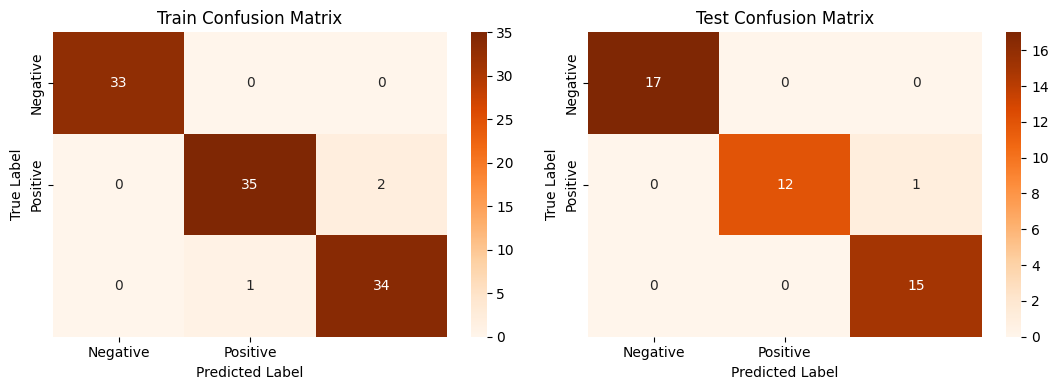


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  33        |
| 1            |    0.972222 | 0.945946 |   0.958904 |  37        |
| 2            |    0.944444 | 0.971429 |   0.957746 |  35        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.972222 | 0.972458 |   0.972217 | 105        |
| weighted avg |    0.971693 | 0.971429 |   0.971434 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 17        |
| 1            |    1        | 0.923077 |   0.96     | 13        |
| 2            |    0.9375   | 1        |   0.967742 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [ ]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [ ]:
score['Random Forest tuned'] = rf2_score

##### Which hyperparameter optimization technique have i used and why?

The hyperparameter optimization technique i used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. RandomizedSearchCV can be a good choice when the parameter space is large and computational resources are limited.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.980952,0.990741,1.000000,0.954548,1.000000,0.971693
Precision Test,0.979167,0.979167,0.979167,0.960784,0.979167,0.979167
Recall Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429
Recall Test,0.977778,0.977778,0.977778,0.955556,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,0.952381,1.000000,0.971429
Accuracy Test,0.977778,0.977778,0.977778,0.955556,0.977778,0.977778
F1 macro Train,0.980952,0.990478,1.000000,0.952353,1.000000,0.971434
F1 macro Test,0.977692,0.977692,0.977692,0.955093,0.977692,0.977692


It appears that hyperparameter tuning improved the performance of the Random Forest model on the train set. But the precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned Random Forest models.

## ***Selection of best model***

In [ ]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Decision Tree tuned,0.954548,0.960784,0.952381,0.955556,0.952381,0.955556,0.952353,0.955093
Random Forest tuned,0.971693,0.979167,0.971429,0.977778,0.971429,0.977778,0.971434,0.977692
Naive Bayes,0.942857,0.979365,0.942857,0.977778,0.942857,0.977778,0.942857,0.977806
Naive Bayes tuned,0.942857,0.979365,0.942857,0.977778,0.942857,0.977778,0.942857,0.977806


In [ ]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [ ]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Naive Bayes - 0.9794
Recall: Random Forest tuned - 0.9778
Accuracy: Random Forest tuned - 0.9778
F1 macro: Naive Bayes - 0.9778


In [ ]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Decision Tree tuned    |       0.952381 |      0.955556 |
| Random Forest tuned    |       0.971429 |      0.977778 |
| Naive Bayes            |       0.942857 |      0.977778 |
| Naive Bayes tuned      |       0.942857 |      0.977778 |


### 1. Which Evaluation metrics did i consider for a positive business impact and why?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our Iris flower classification model. This means that our goal is to maximize the number of true positives (correctly identified the different iris flowers) while minimizing the number of false negatives (incorrectly identified the flowers not a iris flower). By doing so, we aim to ensure that we correctly identify as many different iris flowers, even if it means that we may have some false positives.

### 2. Which ML model did i choose from the above created models as our final prediction model and why?

After evaluating the performance of several machine learning models on the Iris dataset, I have selected the tuned Random Forest as our final prediction model. This decision was based on the model’s performance on our primary evaluation metric of recall, which measures the ability of the model to correctly identify different iris flowers. In our analysis, we found that the Random Forest (tuned) had the highest recall score among the models we evaluated.

I choose recall as the primary evaluation metric because correctly identifying different iris flowers are critical to achieving our business objectives. By selecting a model with a high recall score, we aim to ensure that we correctly identify as many different iris flowers as possible, even if it means that we may have some false positives. Overall, we believe that the Random Forest (tuned) is the best choice for our needs and will help us achieve a positive business impact.

### 3. Explain the model which i have used for the prediction

In [ ]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

In [ ]:
# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa


# **Conclusion**

In the Iris flower classification project, the tuned Random Forest model has been selected as the final prediction model. The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

1. **Data Exploration:** Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species.

2. **Data Preprocessing:** Data preprocessing steps, including handling missing values and encoding categorical variables, were performed to prepare the dataset for modeling.

3. **Model Selection:** After experimenting with various machine learning models, tuned Random Forest was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.

4. **Model Training and Evaluation:** The Random Forest (tuned) model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory accuracy and precision in classifying Iris species.

5. **Challenges and Future Work:** The project encountered challenges related to feature engineering and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.

6. **Practical Application:** The Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate the identification of Iris species based on physical characteristics.

In conclusion, the Iris flower classification project successfully employed Random Forest (tuned) as the final prediction model to classify Iris species. The project's outcomes have practical implications in the field of botany and offer valuable insights into feature importance for species differentiation. Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.